In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 8.6MB/s 
     |████████████████████████████████| 194kB 55.7MB/s 
     |████████████████████████████████| 1.2MB 60.9MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
     |████████████████████████████████| 61kB 8.7MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
pattern_types = 'double_top', 'double_bottom', 'head_and_shoulders', 'inverse_head_and_shoulders', 'reversal_rising_wedge', 'reversal_falling_wedge', 
'continuous_rising_wedge', 'continuous_falling_wedge', 'bullish_rectangle', 'bearish_rectangle', 'bullish_pennant', 'bearish_pennant'
path = Path('gdrive/MyDrive/pattern')

In [4]:
fns = get_image_files(path)
fns

(#865) [Path('gdrive/MyDrive/pattern/head_and_shoulder/3.png'),Path('gdrive/MyDrive/pattern/head_and_shoulder/일루미나.png'),Path('gdrive/MyDrive/pattern/head_and_shoulder/레킷벤키저.png'),Path('gdrive/MyDrive/pattern/head_and_shoulder/CVS 케어마크.png'),Path('gdrive/MyDrive/pattern/head_and_shoulder/Ping An Bank.png'),Path('gdrive/MyDrive/pattern/head_and_shoulder/시그나.png'),Path('gdrive/MyDrive/pattern/head_and_shoulder/JP모건 체이스.png'),Path('gdrive/MyDrive/pattern/head_and_shoulder/33.png'),Path('gdrive/MyDrive/pattern/head_and_shoulder/35.png'),Path('gdrive/MyDrive/pattern/head_and_shoulder/Wells Fargo _ Co.png')...]

In [5]:
failed = verify_images(fns)
failed

(#0) []

In [6]:
patterns = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=Resize(128))

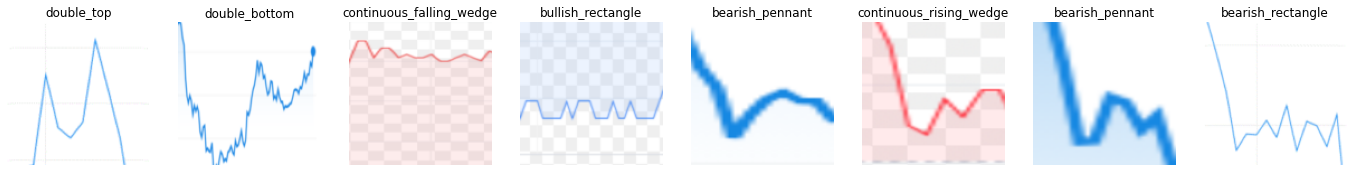

In [7]:
patterns = patterns.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = patterns.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=1)

In [8]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(8)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,3.272829,1.990825,0.589595,00:03


epoch,train_loss,valid_loss,error_rate,time
0,1.948966,1.437343,0.468208,00:03
1,1.524734,1.144700,0.398844,00:03
2,1.150903,1.051401,0.312139,00:03
3,0.870017,0.904156,0.254335,00:03
4,0.661000,0.952706,0.283237,00:03
5,0.516594,0.939773,0.260116,00:03
6,0.409703,0.942341,0.260116,00:03
7,0.334845,0.939213,0.254335,00:03


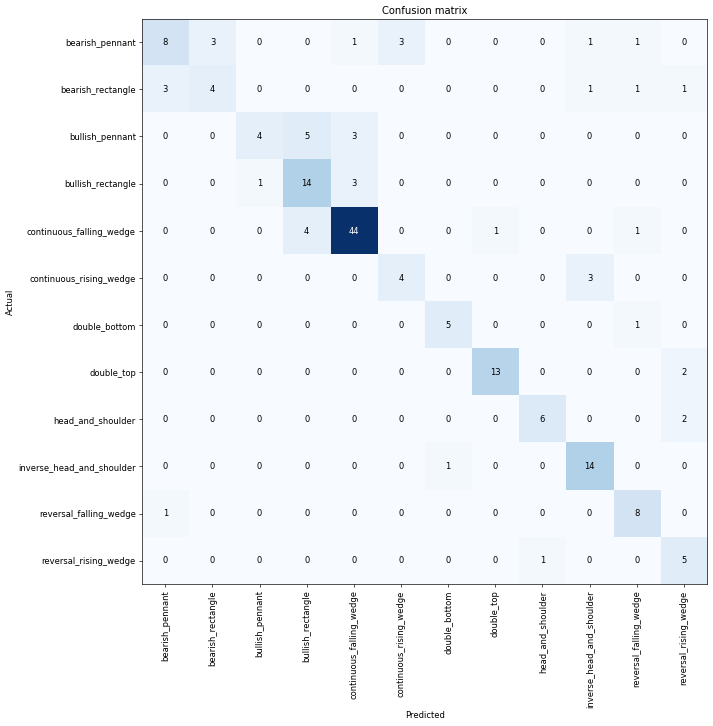

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

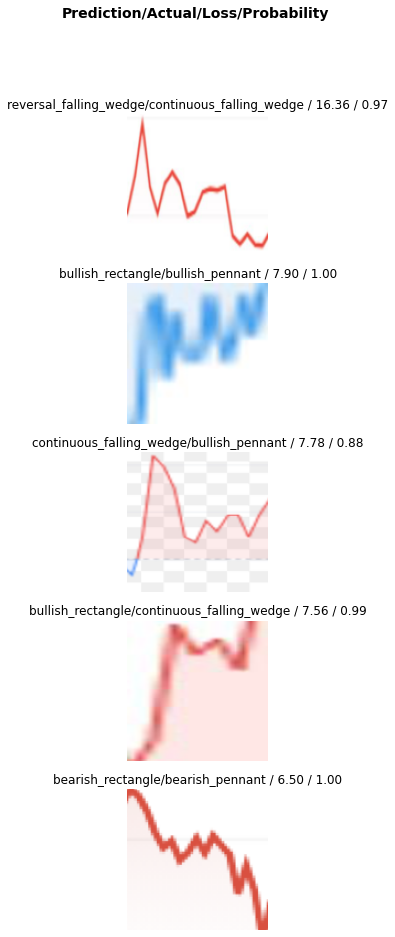

In [10]:
interp.plot_top_losses(5, nrows=5)

In [11]:
interp.most_confused(min_val=2)

[('bullish_pennant', 'bullish_rectangle', 5),
 ('continuous_falling_wedge', 'bullish_rectangle', 4),
 ('bearish_pennant', 'bearish_rectangle', 3),
 ('bearish_pennant', 'continuous_rising_wedge', 3),
 ('bearish_rectangle', 'bearish_pennant', 3),
 ('bullish_pennant', 'continuous_falling_wedge', 3),
 ('bullish_rectangle', 'continuous_falling_wedge', 3),
 ('continuous_rising_wedge', 'inverse_head_and_shoulder', 3),
 ('double_top', 'reversal_rising_wedge', 2),
 ('head_and_shoulder', 'reversal_rising_wedge', 2)]

In [12]:
learn.export()

In [13]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]